# Regression Models

##### My personal experiments using code I worked with in labs in the IBM Data Science Certificate program found [here](https://www.coursera.org/professional-certificates/ibm-data-analyst?utm_medium=sem&utm_source=gg&utm_campaign=B2C_NAMER_ibm-data-analyst_ibm_FTCOF_professional-certificates_country-US-country-CA&campaignid=19984826761&adgroupid=147671564346&device=c&keyword=&matchtype=&network=g&devicemodel=&adposition=&creativeid=655104109353&hide_mobile_promo&gclid=CjwKCAjw9J2iBhBPEiwAErwpeXkCIEkfWurvPFIJ6EbeUQ7OLD3VS08kflIalPF02exhA3fLeCzg_BoC-5UQAvD_BwE).

In [2]:
import numpy as np
print("numpy version: ", np.__version__)
import matplotlib as mpl
print("matplotlb version: ", mpl.__version__)
import matplotlib.pyplot as plt
import pandas as pd

numpy version:  1.22.3
matplotlb version:  3.7.0


In [88]:
dict = {'Student':['Bob','Sally','Joe','Carly','Suzy','Remy','George','Rosemary','RJ','Steve','Carl','Pedro','Phyllis','Randy','Anna','Al','Carol','Rob','Sarah','Jeff'],
        'Age':[14,14,14,15,15,15,15,15,15,16,17,15,16,15,16,16,16,16,17,17],
        'Grade':[100,92,95,94,87,86,80,78,92,75,68,88,85,90,92,82,81,75,72,65],
        'Sport':[0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1],
        'Sport_cat':['No','No','No','Yes','No','No','No','No','Yes','Yes','Yes','Yes','Yes','No','No','Yes','No','Yes','Yes','Yes'],
        'Attendance':[100,98,99,97,94,90,85,75,93,80,72,93,91,93,96,90,85,78,70,60],
        'Test_Anxiety':[0,40,20,9,45,50,60,80,12,24,36,0,33,16,7,30,40,50,20,70],
        }
dict
df = pd.DataFrame(dict) 
df.head()

,Student,Age,Grade,Sport,Sport_cat,Attendance,Test_Anxiety
0,Bob,14,100,0,No,100,0
1,Sally,14,92,0,No,98,40
2,Joe,14,95,0,No,99,20
3,Carly,15,94,1,Yes,97,9
4,Suzy,15,87,0,No,94,45


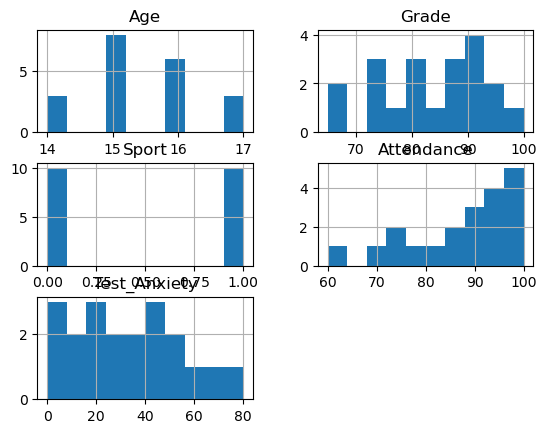

In [89]:
df_hist = df[['Age','Grade','Sport','Attendance','Test_Anxiety']]
df_hist.hist()
plt.show()

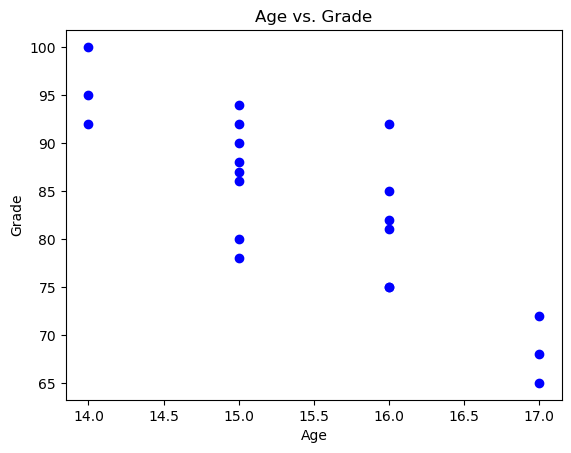

In [90]:
plt.scatter(df.Age, df.Grade,  color='blue')
plt.xlabel("Age")
plt.ylabel("Grade")
plt.title('Age vs. Grade')
plt.show()

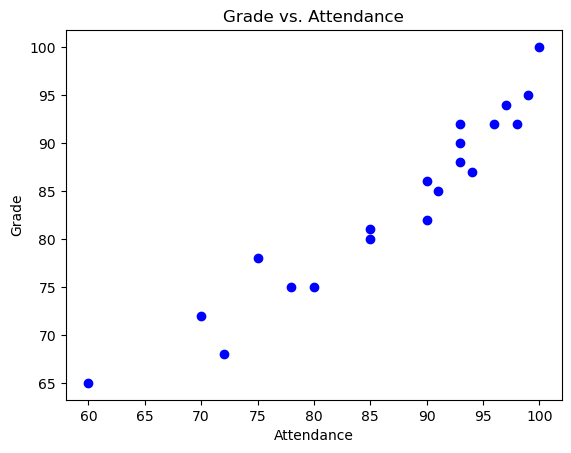

In [91]:
plt.scatter(df.Attendance, df.Grade,  color='blue')
plt.xlabel("Attendance")
plt.ylabel("Grade")
plt.title('Grade vs. Attendance')
plt.show()

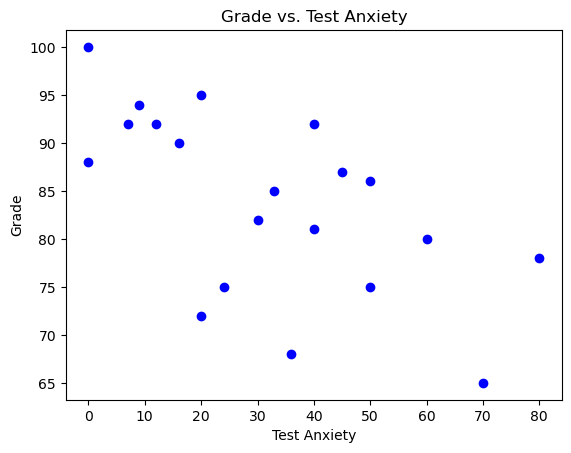

In [92]:
plt.scatter(df.Test_Anxiety, df.Grade,  color='blue')
plt.xlabel("Test Anxiety")
plt.ylabel("Grade")
plt.title('Grade vs. Test Anxiety')
plt.show()

## Creating training and test sets from our data

In [93]:
# 80% of our data will be used for training
# 20% will be used for testing
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

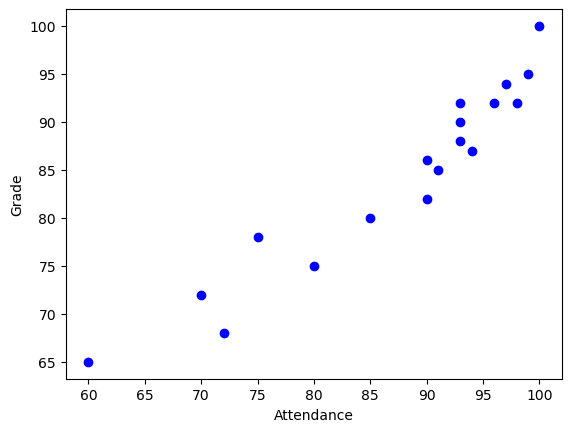

In [94]:
# Train data distribution
plt.scatter(train.Attendance, train.Grade,  color='blue')
plt.xlabel("Attendance")
plt.ylabel("Grade")
plt.show()

In [95]:
# Using Sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Attendance']])
train_y = np.asanyarray(train[['Grade']])
regr.fit(train_x, train_y)
# The coefficients
# slope
print ('Coefficients: ', regr.coef_)
# y-intercept
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.81590954]]
Intercept:  [13.06258679]


Text(0.5, 1.0, 'Grade vs. Attendance Training Data')

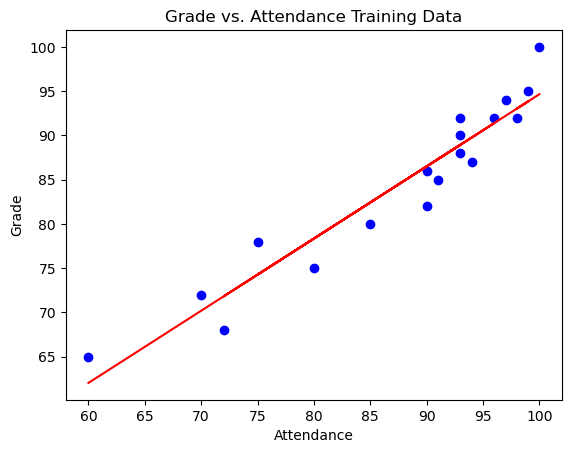

In [96]:
# plot training data and linear regression
plt.scatter(train.Attendance, train.Grade,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Attendance")
plt.ylabel("Grade")
plt.title("Grade vs. Attendance Training Data")

In [97]:
# Printing r-squared from using our test data on the model made from train data
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Attendance']])
test_y = np.asanyarray(test[['Grade']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.56
Residual sum of squares (MSE): 2.45
R2-score: 0.73


In [98]:
# Let's try sports instead of age
train_x = train[["Test_Anxiety"]]
test_x = test[["Test_Anxiety"]]

In [99]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [100]:
predictions = regr.predict(test_x)

In [101]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 2.99


## Multiple Linear Regression

In [102]:
df2 = df[['Attendance', 'Test_Anxiety', 'Grade']]
df2.head()

,Attendance,Test_Anxiety,Grade
0,100,0,100
1,98,40,92
2,99,20,95
3,97,9,94
4,94,45,87


In [103]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Attendance', 'Test_Anxiety']])
y = np.asanyarray(train[['Grade']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.79293999 -0.01951782]]


In [104]:
# Ordinary least squares method
y_hat= regr.predict(test[['Attendance', 'Test_Anxiety']])
x = np.asanyarray(test[['Attendance', 'Test_Anxiety']])
y = np.asanyarray(test[['Grade']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2.03
Variance score: 0.77


/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## K-Nearest Neighbors

In [105]:
df['Age'].value_counts()

15    8
16    6
14    3
17    3
Name: Age, dtype: int64

In [106]:
# Convert pandas data frame to numpy array
X = df[['Attendance','Grade','Test_Anxiety']].values
# similar to df head function
X[0:5]

array([[100, 100,   0],
       [ 98,  92,  40],
       [ 99,  95,  20],
       [ 97,  94,   9],
       [ 94,  87,  45]])

In [107]:
y = df[['Age']].values
y[0:5]

array([[14],
       [14],
       [14],
       [15],
       [15]])

In [108]:
# Normalize Data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.20881275,  1.74020978, -1.45700023],
       [ 1.02355409,  0.87818636,  0.35857638],
       [ 1.11618342,  1.20144514, -0.54921192],
       [ 0.93092476,  1.09369222, -1.04849549],
       [ 0.65303677,  0.33942172,  0.58552346]])

In [109]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 3) (16, 1)
Test set: (4, 3) (4, 1)


In [110]:
# KNN training
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [111]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([16, 15, 16, 15])

In [112]:
print(y_test)

[[17]
 [15]
 [17]
 [15]]


In [113]:
print(yhat)

[16 15 16 15]


In [114]:
# Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8125
Test set Accuracy:  0.5


In [115]:
# Calculate the mean accuracy for different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when

array([0.5 , 0.5 , 0.  , 0.5 , 0.25, 0.5 , 0.  , 0.  , 0.  ])

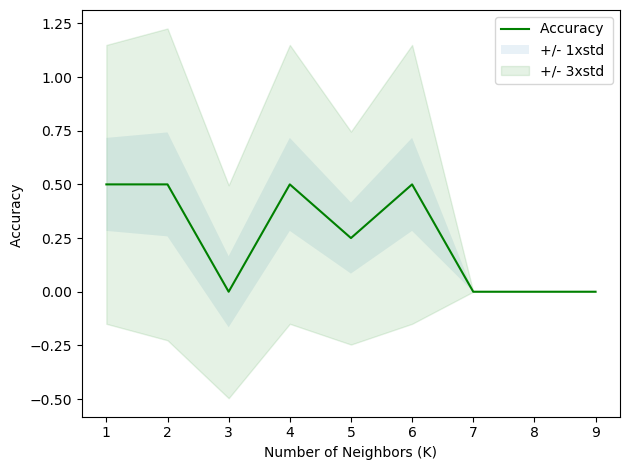

In [116]:
# plot the accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [117]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5 with k= 1


## Decision Trees

In [118]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

X = df[['Attendance','Grade','Test_Anxiety','Sport_cat']].values
X[0:5]

array([[100, 100, 0, 'No'],
       [98, 92, 40, 'No'],
       [99, 95, 20, 'No'],
       [97, 94, 9, 'Yes'],
       [94, 87, 45, 'No']], dtype=object)

In [120]:
# Converting categorical data into numerical
from sklearn import preprocessing
sport_num = preprocessing.LabelEncoder()
sport_num.fit(['No','Yes'])
# the fourth column is sport, so we use index 3
X[:,3] = sport_num.transform(X[:,3]) 
X[0:5]

array([[100, 100, 0, 0],
       [98, 92, 40, 0],
       [99, 95, 20, 0],
       [97, 94, 9, 1],
       [94, 87, 45, 0]], dtype=object)

In [121]:
print(df.dtypes)

Student         object
Age              int64
Grade            int64
Sport            int64
Sport_cat       object
Attendance       int64
Test_Anxiety     int64
dtype: object


In [122]:
# We want to change Age to a string so that we are working with categorical data for y
y = df["Age"].astype(str)
y[0:5]

0    14
1    14
2    14
3    15
4    15
Name: Age, dtype: object

In [123]:
from sklearn.model_selection import train_test_split
# 70% of data is for training 30% for testing
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (14, 4) &  Size of Y training set (14,)


In [124]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (6, 4) &  Size of Y testing set (6,)


In [125]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [126]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [129]:
predTree = drugTree.predict(X_testset)
print ("Prediction tree: ",predTree [0:5])
print ("Age test set: ", y_testset [0:5])

Prediction tree:  ['15' '15' '15' '15' '15']
Age test set:  14    16
2     14
1     14
17    16
4     15
Name: Age, dtype: object


In [130]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.3333333333333333


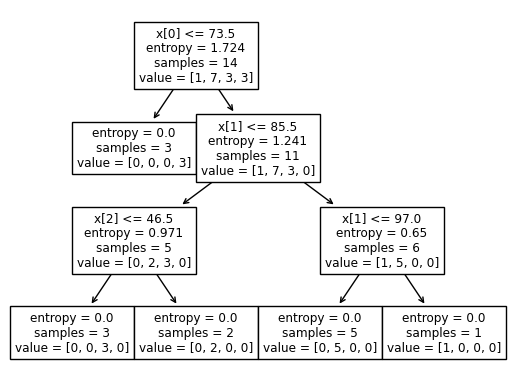

In [131]:
tree.plot_tree(drugTree)
plt.show()

# Regression Tree

In [159]:
from sklearn.tree import DecisionTreeRegressor
X = df.drop(columns=["Student","Age","Sport_cat"])
Y = df["Age"]
X.head()

,Grade,Sport,Attendance,Test_Anxiety
0,100,0,100,0
1,92,0,98,40
2,95,0,99,20
3,94,1,97,9
4,87,0,94,45


In [160]:
Y.head()

0    14
1    14
2    14
3    15
4    15
Name: Age, dtype: int64

In [161]:
# 80% of data is for training 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [162]:
# Creating regression tree
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

In [163]:
# Training
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [164]:
regression_tree.score(X_test, Y_test)

0.2727272727272727

In [167]:
prediction = regression_tree.predict(X_test)

print("Age Error: ",(prediction - Y_test).abs().mean())

Age Error:  0.5


# Logisitic Regression

In [172]:
X = np.asarray(df[['Age', 'Grade', 'Attendance', 'Test_Anxiety']])
X[0:5]

array([[ 14, 100, 100,   0],
       [ 14,  92,  98,  40],
       [ 14,  95,  99,  20],
       [ 15,  94,  97,   9],
       [ 15,  87,  94,  45]])

In [175]:
y = np.asarray(df['Sport'])
y [0:5]

array([0, 0, 0, 1, 0])

In [177]:
from sklearn import preprocessing
# Normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.5750638 ,  1.74020978,  1.20881275, -1.45700023],
       [-1.5750638 ,  0.87818636,  1.02355409,  0.35857638],
       [-1.5750638 ,  1.20144514,  1.11618342, -0.54921192],
       [-0.4888129 ,  1.09369222,  0.93092476, -1.04849549],
       [-0.4888129 ,  0.33942172,  0.65303677,  0.58552346]])

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 4) (16,)
Test set: (4, 4) (4,)


In [179]:
# Modeling logistic regression with Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [180]:
# prediction
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 0])

In [182]:
# P(Y=1|X)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.45767187, 0.54232813],
       [0.5191556 , 0.4808444 ],
       [0.46305398, 0.53694602],
       [0.5062907 , 0.4937093 ]])

In [183]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5

In [184]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2 1]
 [0 1]]


Confusion matrix, without normalization
[[2 1]
 [0 1]]


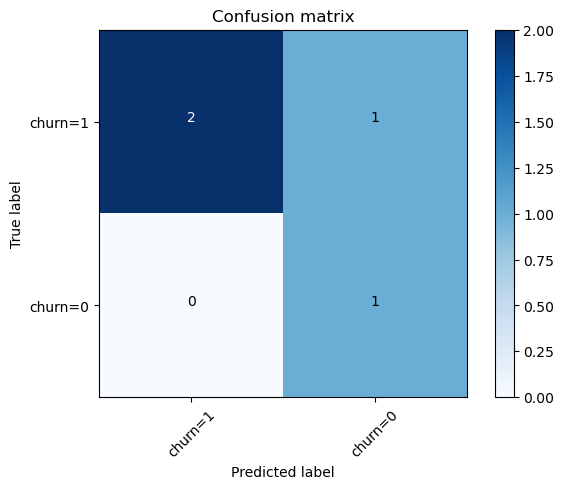

In [185]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [187]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [188]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6616493953372603

In [189]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.72


# SVM - Support Vector Machines

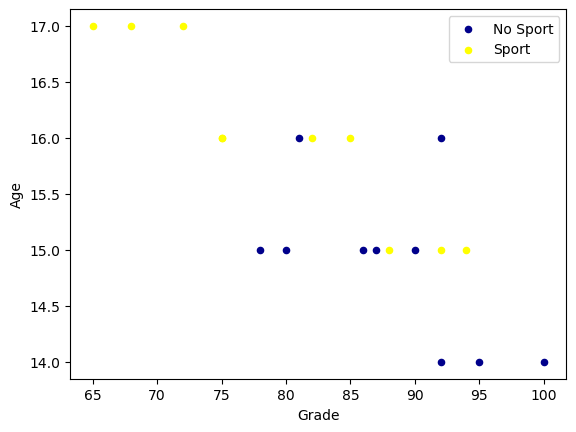

In [195]:
ax = df[df['Sport'] == 0][0:50].plot(kind='scatter', x='Grade', y='Age', color='DarkBlue', label='No Sport');
df[df['Sport'] == 1][0:50].plot(kind='scatter', x='Grade', y='Age', color='Yellow', label='Sport', ax=ax);
plt.show()

In [197]:
df.dtypes

Student         object
Age              int64
Grade            int64
Sport            int64
Sport_cat       object
Attendance       int64
Test_Anxiety     int64
dtype: object

In [198]:
feature_df = df[['Grade','Age','Sport']]
X = np.asarray(feature_df)
X[0:5]

array([[100,  14,   0],
       [ 92,  14,   0],
       [ 95,  14,   0],
       [ 94,  15,   1],
       [ 87,  15,   0]])

In [199]:
df['Sport'] = df['Sport'].astype('int')
y = np.asarray(df['Sport'])
y [0:5]

array([0, 0, 0, 1, 0])

In [200]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 3) (16,)
Test set: (4, 3) (4,)


In [201]:
from sklearn import svm
# Radial Basis function
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [202]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0])

/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paigeknittel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

Confusion matrix, without normalization
[[1 0]
 [3 0]]


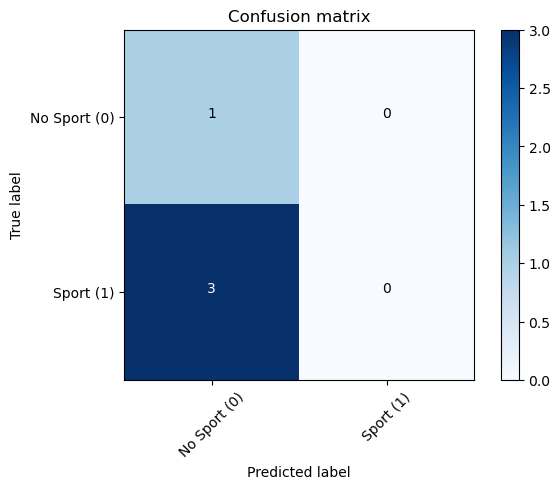

In [204]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Sport (0)','Sport (1)'],normalize= False,  title='Confusion matrix')

In [205]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.1

In [210]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.25

In [209]:
jaccard_score(y_test, yhat,pos_label=1)

0.0

In [211]:
# Those results were quite bad, let's try linear kernel
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=0))

Avg F1-score: 1.0000
Jaccard score: 1.0000


In [212]:
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=1))

Jaccard score: 1.0000


In [214]:
print('The linear model is a better estimate.')

The linear model is a better estimate.


# Softmax Regression - Multi-class Classification
### One vs. All
### One vs. One

# k-Means

In [5]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>

In [6]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

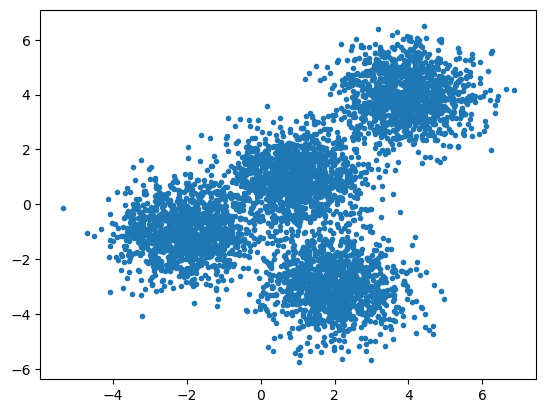

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [8]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [9]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [10]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [11]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

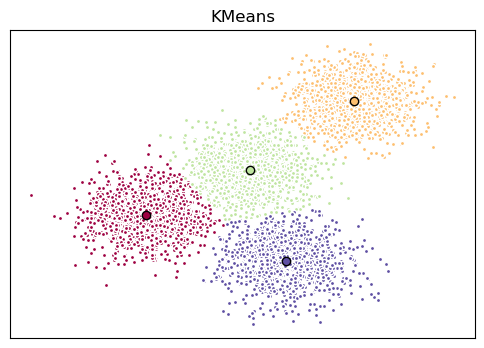

In [12]:

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

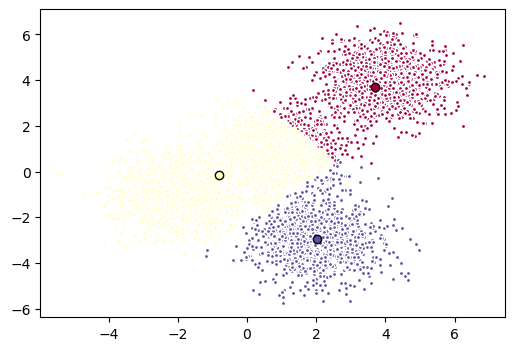

In [13]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()